In [1]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap 


from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap 
import lightgbm as lgb

from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap 
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor

from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap 
import lightgbm as lgb
from xgboost import XGBRegressor

/home/defuser/miniconda3/envs/moghis/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load and preprocess data Train
file_path = '/home/data3/Ali/Code/Moghis/Train-data-preprocessed-2.xlsx'
data = pd.read_excel(file_path)

# Load and preprocess data Test
file_path = '/home/data3/Ali/Code/Moghis/Test-data-preprocessed-2.xlsx'
data_test = pd.read_excel(file_path)

# Define features and target
features = [
    'uid', 'age_03', 'urban_03', 'married_03', 'n_mar_03', 'edu_gru_03', 'n_living_child_03',
    'migration_03', 'glob_hlth_03', 'adl_dress_03', 'adl_walk_03', 'adl_bath_03', 'adl_eat_03',
    'adl_bed_03', 'adl_toilet_03', 'n_adl_03', 'iadl_money_03', 'iadl_meds_03', 'iadl_shop_03',
    'iadl_meals_03', 'n_iadl_03', 'depressed_03', 'hard_03', 'restless_03', 'happy_03', 'lonely_03',
    'enjoy_03', 'sad_03', 'tired_03', 'energetic_03', 'n_depr_03', 'cesd_depressed_03',
    'hypertension_03', 'diabetes_03', 'resp_ill_03', 'arthritis_03', 'hrt_attack_03', 'stroke_03',
    'cancer_03', 'n_illnesses_03', 'exer_3xwk_03', 'alcohol_03', 'tobacco_03', 'test_chol_03',
    'test_tuber_03', 'test_diab_03', 'test_pres_03', 'hosp_03', 'visit_med_03', 'out_proc_03',
    'visit_dental_03', 'imss_03', 'issste_03', 'pem_def_mar_03', 'insur_private_03', 'insur_other_03',
    'insured_03', 'decis_personal_03', 'employment_03', 'age_12', 'urban_12', 'married_12',
    'n_mar_12', 'edu_gru_12', 'n_living_child_12', 'migration_12', 'glob_hlth_12', 'adl_dress_12',
    'adl_walk_12', 'adl_bath_12', 'adl_eat_12', 'adl_bed_12', 'adl_toilet_12', 'n_adl_12',
    'iadl_money_12', 'iadl_meds_12', 'iadl_shop_12', 'iadl_meals_12', 'n_iadl_12', 'depressed_12',
    'hard_12', 'restless_12', 'happy_12', 'lonely_12', 'enjoy_12', 'sad_12', 'tired_12',
    'energetic_12', 'n_depr_12', 'cesd_depressed_12', 'hypertension_12', 'diabetes_12',
    'resp_ill_12', 'arthritis_12', 'hrt_attack_12', 'stroke_12', 'cancer_12', 'n_illnesses_12',
    'bmi_12', 'exer_3xwk_12', 'alcohol_12', 'tobacco_12', 'test_chol_12', 'test_tuber_12',
    'test_diab_12', 'test_pres_12', 'hosp_12', 'visit_med_12', 'out_proc_12', 'visit_dental_12',
    'imss_12', 'issste_12', 'pem_def_mar_12', 'insur_private_12', 'insur_other_12', 'insured_12',
    'decis_famil_12', 'decis_personal_12', 'employment_12', 'vax_flu_12', 'vax_pneu_12', 'seg_pop_12',
    'care_adult_12', 'care_child_12', 'volunteer_12', 'attends_class_12', 'attends_club_12',
    'reads_12', 'games_12', 'table_games_12', 'comms_tel_comp_12', 'act_mant_12', 'tv_12',
    'sewing_12', 'satis_ideal_12', 'satis_excel_12', 'satis_fine_12', 'cosas_imp_12',
    'wouldnt_change_12', 'memory_12', 'ragender', 'rameduc_m', 'rafeduc_m', 'sgender_03',
    'rearnings_03', 'searnings_03', 'hincome_03', 'hinc_business_03', 'hinc_rent_03', 'hinc_assets_03',
    'hinc_cap_03', 'rinc_pension_03', 'sinc_pension_03', 'rrelgimp_03', 'sgender_12', 'rjlocc_m_12',
    'rearnings_12', 'searnings_12', 'hincome_12', 'hinc_business_12', 'hinc_rent_12', 'hinc_assets_12',
    'hinc_cap_12', 'rinc_pension_12', 'sinc_pension_12', 'rrelgimp_12', 'rrfcntx_m_12',
    'rsocact_m_12', 'rrelgwk_12', 'a34_12', 'j11_12', 'year', 'hincome_change',
    'niadl_change', 'adl_change', 'depr_change', 'glob_hlth_change', 'edu_gru_change',
    'illnesses_change'
    ]

target = 'composite_score'

######################## Process Train Data ####################
data[features] = data[features].apply(pd.to_numeric, errors='coerce')
data[features] = data[features].fillna(data[features].mean())
data = data.dropna(subset=[target])

X_train = data[features]
y_train = data[target]

######################## Process Test Data ####################
data_test[features] = data_test[features].apply(pd.to_numeric, errors='coerce')
data_test[features] = data_test[features].fillna(data[features].mean())
data_test = data_test.dropna(subset=[target])

X_test = data_test[features]
y_test = data_test[target]

## LighGBoost ##

/home/defuser/miniconda3/envs/moghis/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1214
[LightGBM] [Info] Number of data points in the train set: 4323, number of used features: 154
[LightGBM] [Info] Start training from score 157.031922
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 500 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

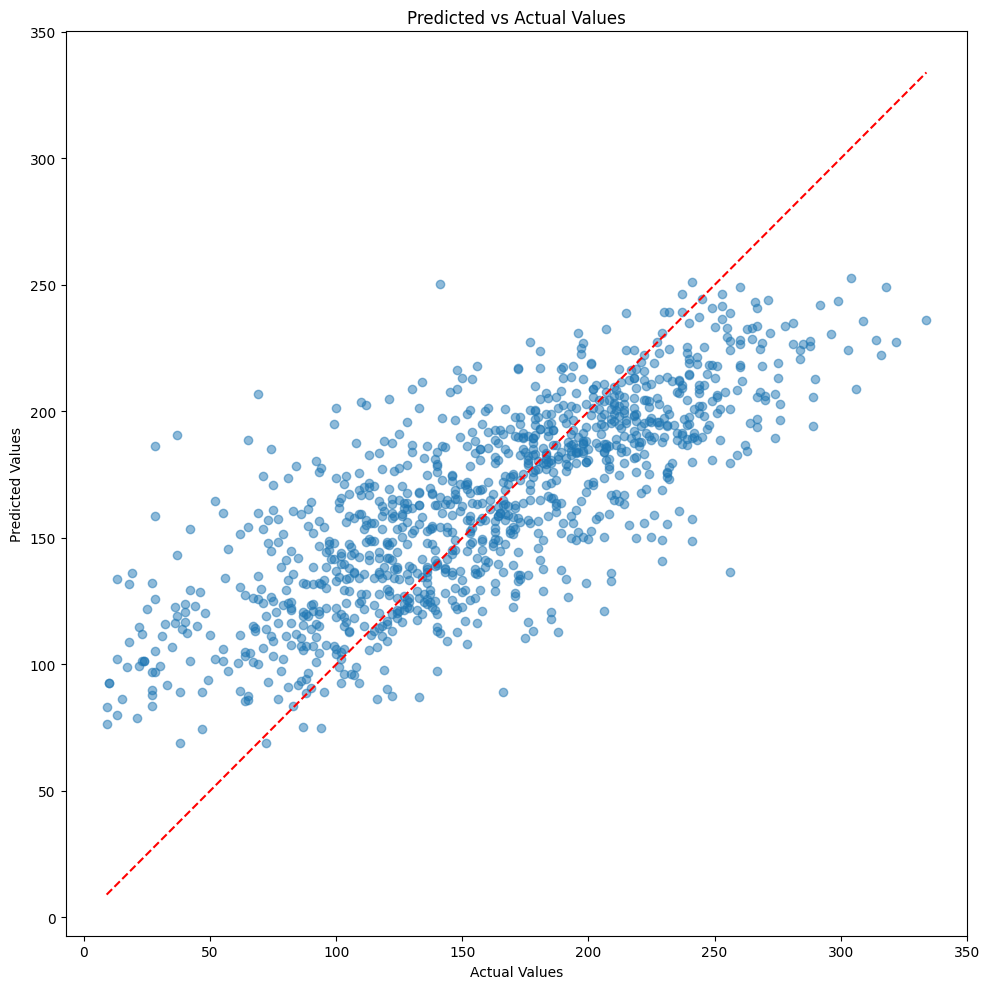

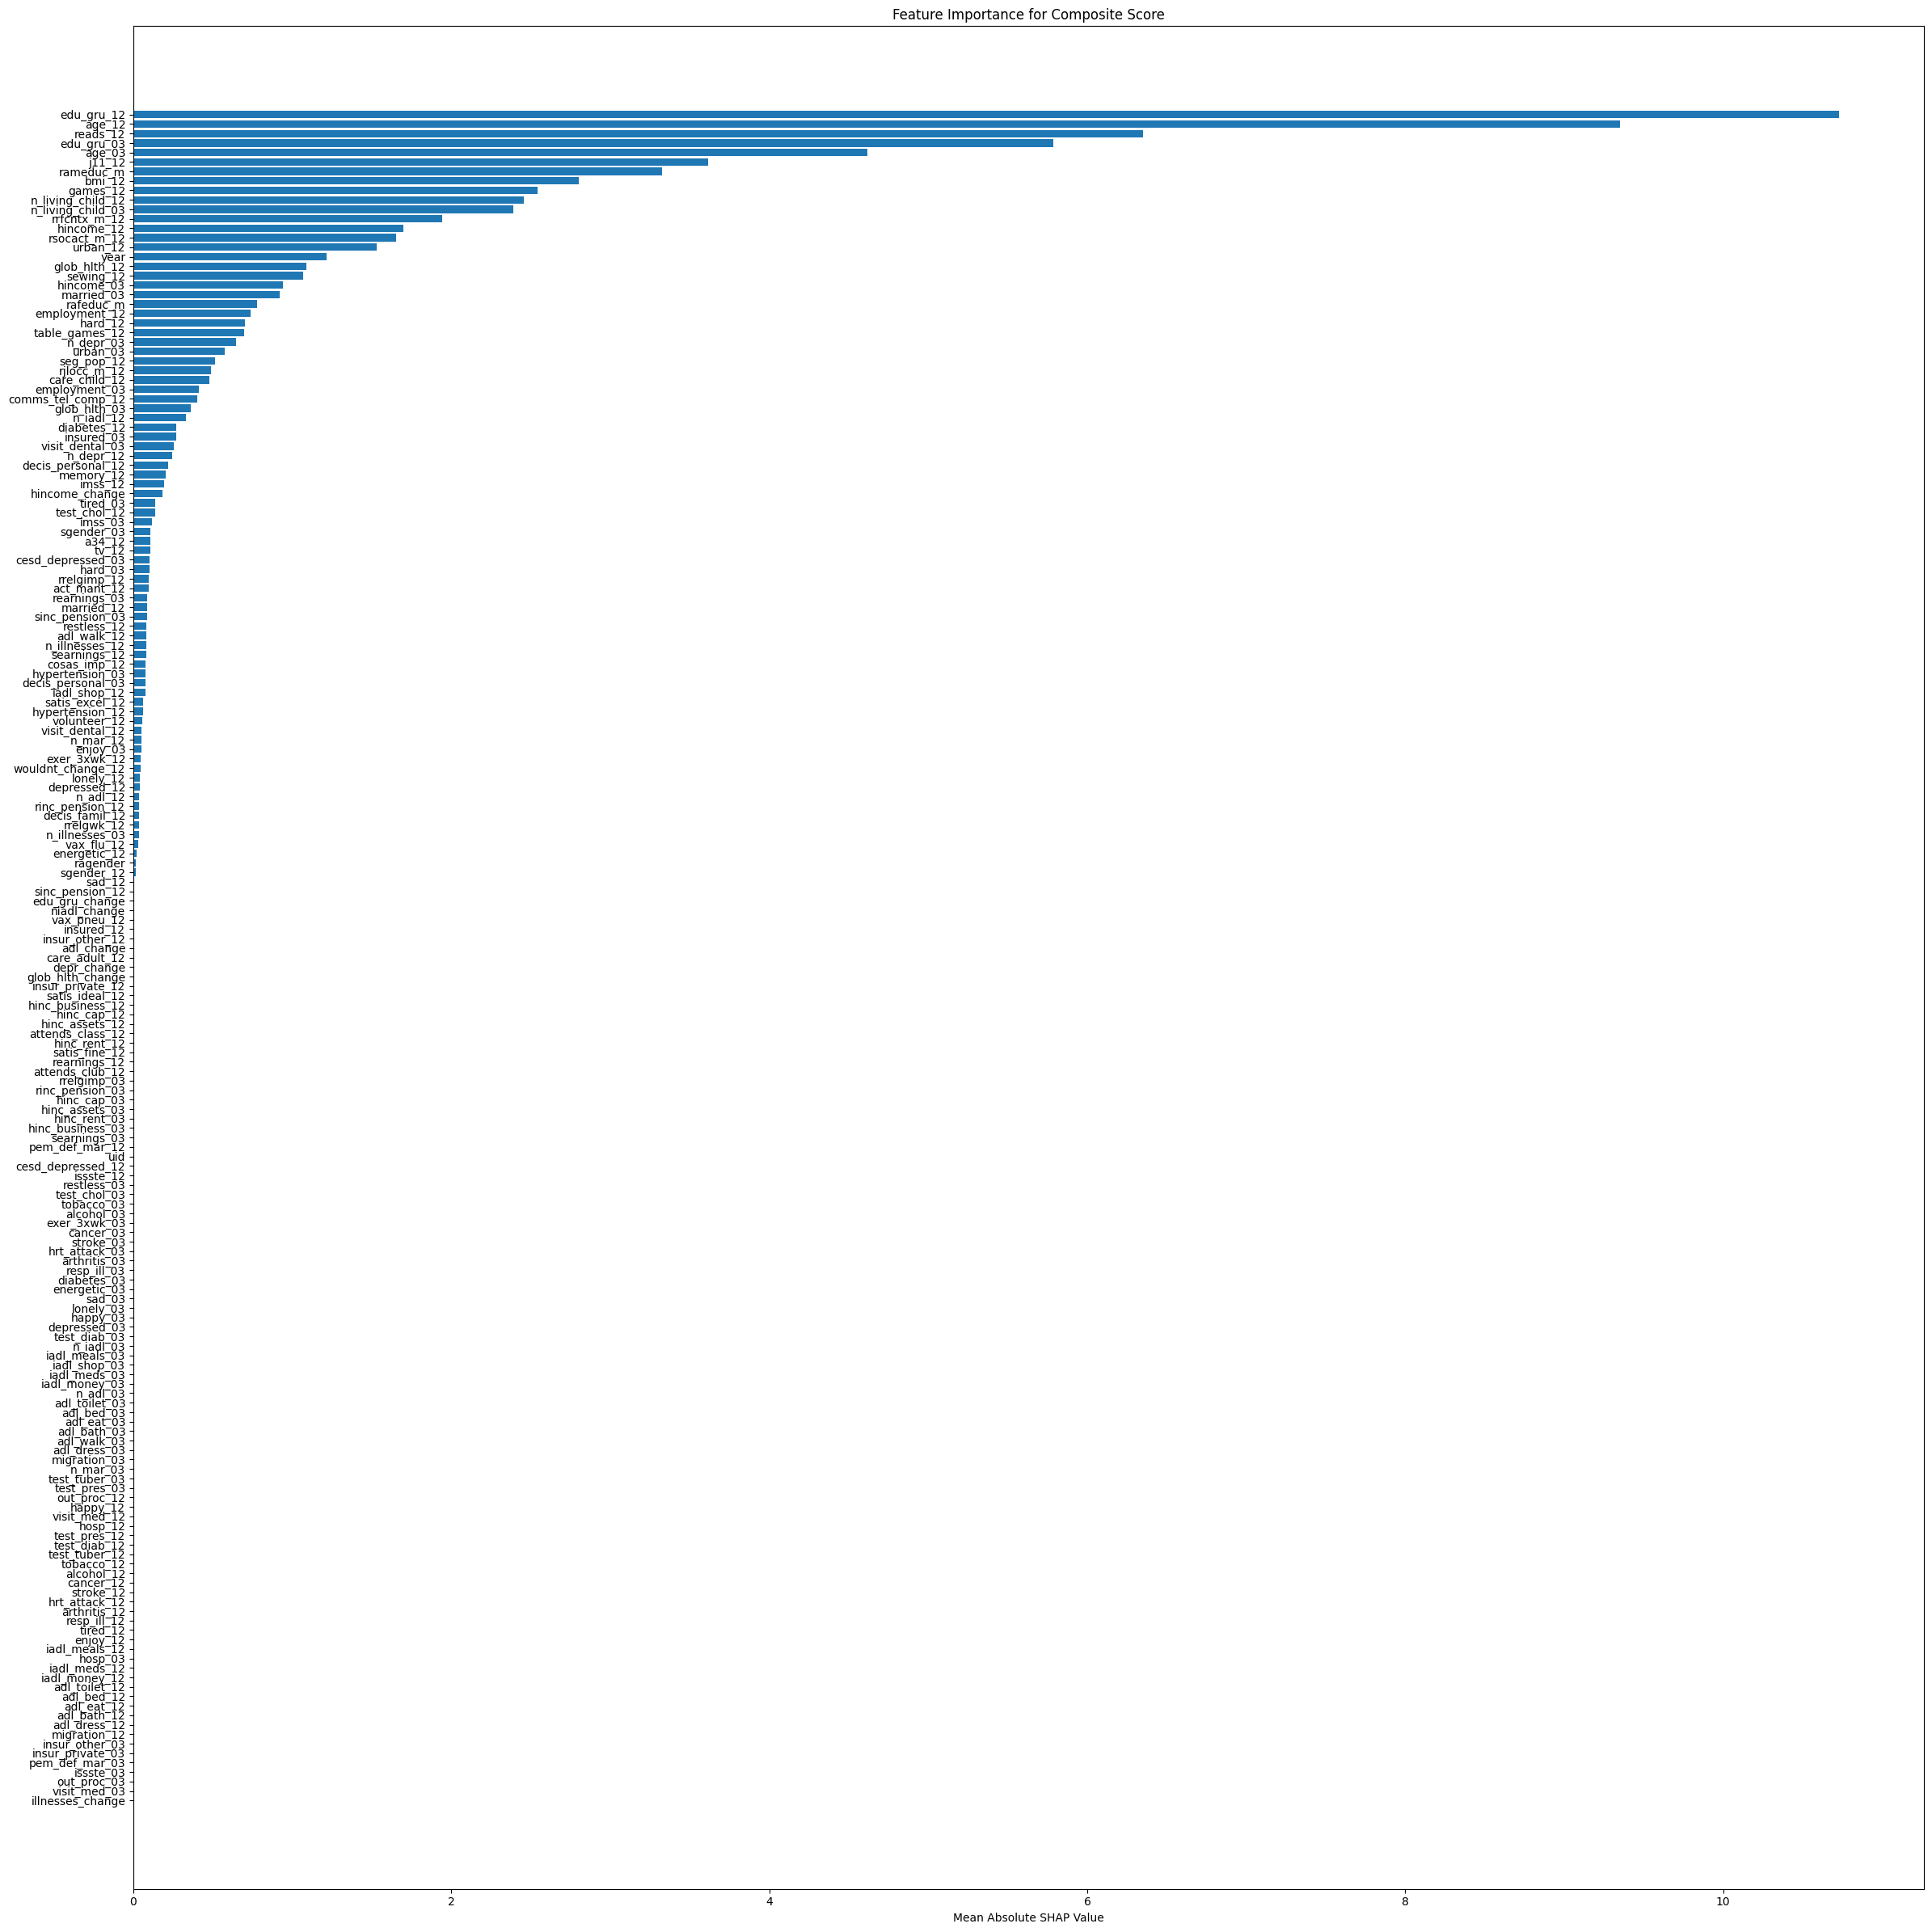

In [7]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.001, random_state=42)

# Best parameters for CatBoost
best_params = {
  'learning_rate': 0.07089438962267576,
  'num_leaves': 49,
  'max_depth': 4,
  'feature_fraction': 0.4839642718097913,
  'bagging_fraction': 0.5497799156909652,
  'lambda_l1': 0.058207015936292725,
  'lambda_l2': 0.08350139961819975,
  'min_child_samples': 85,
  'n_estimators': 4077
}

model2 = lgb.train(
    params=best_params,
    train_set=lgb.Dataset(X_train, label=y_train),
    valid_sets=lgb.Dataset(X_val, label=y_val),
    num_boost_round=best_params['n_estimators'],
    callbacks=[
        lgb.early_stopping(stopping_rounds=500, verbose=True),
    ]
)

# Make predictions
y_pred = model2.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Plot predictions vs actual
def plot_predictions_vs_actual(y_test, y_pred):
    plt.figure(figsize=(10, 10))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Predicted vs Actual Values")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.tight_layout()
    plt.savefig('/home/data3/Ali/Code/Moghis/results/LightBoost/predictions_vs_actual_composite_score.png', bbox_inches='tight')
    plt.show()

plot_predictions_vs_actual(y_test, y_pred)

explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(X_test)
feature_importance = pd.DataFrame({
    'Feature': features,
    'Mean_Absolute_SHAP': np.mean(np.abs(shap_values), axis=0)
})

feature_importance = feature_importance.sort_values(by='Mean_Absolute_SHAP', ascending=False)

feature_importance.to_csv('/home/data3/Ali/Code/Moghis/results/LightBoost/feature_importance_composite_score.csv', index=False)
plt.figure(figsize=(24, 24))
plt.barh(feature_importance['Feature'], feature_importance['Mean_Absolute_SHAP'])
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Feature Importance for Composite Score')
plt.tight_layout()
plt.show()
plt.savefig('/home/data3/Ali/Code/Moghis/results/LightBoost/feature_importance_plot_composite_score.png', bbox_inches='tight')
plt.close()

## CatBoost ##

0:	learn: 60.2803525	test: 62.6293591	best: 62.6293591 (0)	total: 2.7ms	remaining: 3.31s
100:	learn: 40.9819562	test: 43.3128246	best: 43.3128246 (100)	total: 151ms	remaining: 1.68s
200:	learn: 38.0861629	test: 41.2084317	best: 41.1937869 (195)	total: 298ms	remaining: 1.52s
300:	learn: 36.4451877	test: 40.5672851	best: 40.5638543 (297)	total: 446ms	remaining: 1.37s
400:	learn: 34.7631357	test: 40.2340127	best: 40.2315162 (399)	total: 593ms	remaining: 1.22s
500:	learn: 33.1107544	test: 40.0190615	best: 40.0008982 (478)	total: 740ms	remaining: 1.07s
600:	learn: 31.5720060	test: 39.9640971	best: 39.9616535 (596)	total: 888ms	remaining: 921ms
700:	learn: 30.2463294	test: 39.9586835	best: 39.8961284 (648)	total: 1.03s	remaining: 772ms
800:	learn: 29.0819090	test: 40.0294036	best: 39.8961284 (648)	total: 1.18s	remaining: 625ms
900:	learn: 28.0157727	test: 40.0365021	best: 39.8961284 (648)	total: 1.33s	remaining: 477ms
1000:	learn: 26.9387882	test: 40.1275736	best: 39.8961284 (648)	total: 1.4

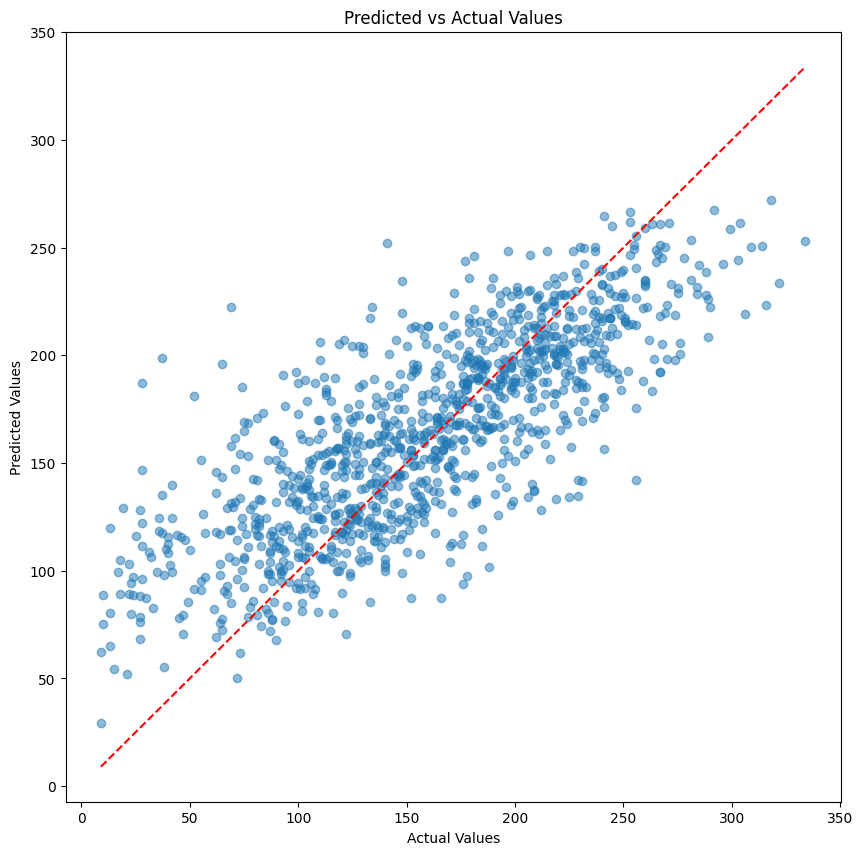

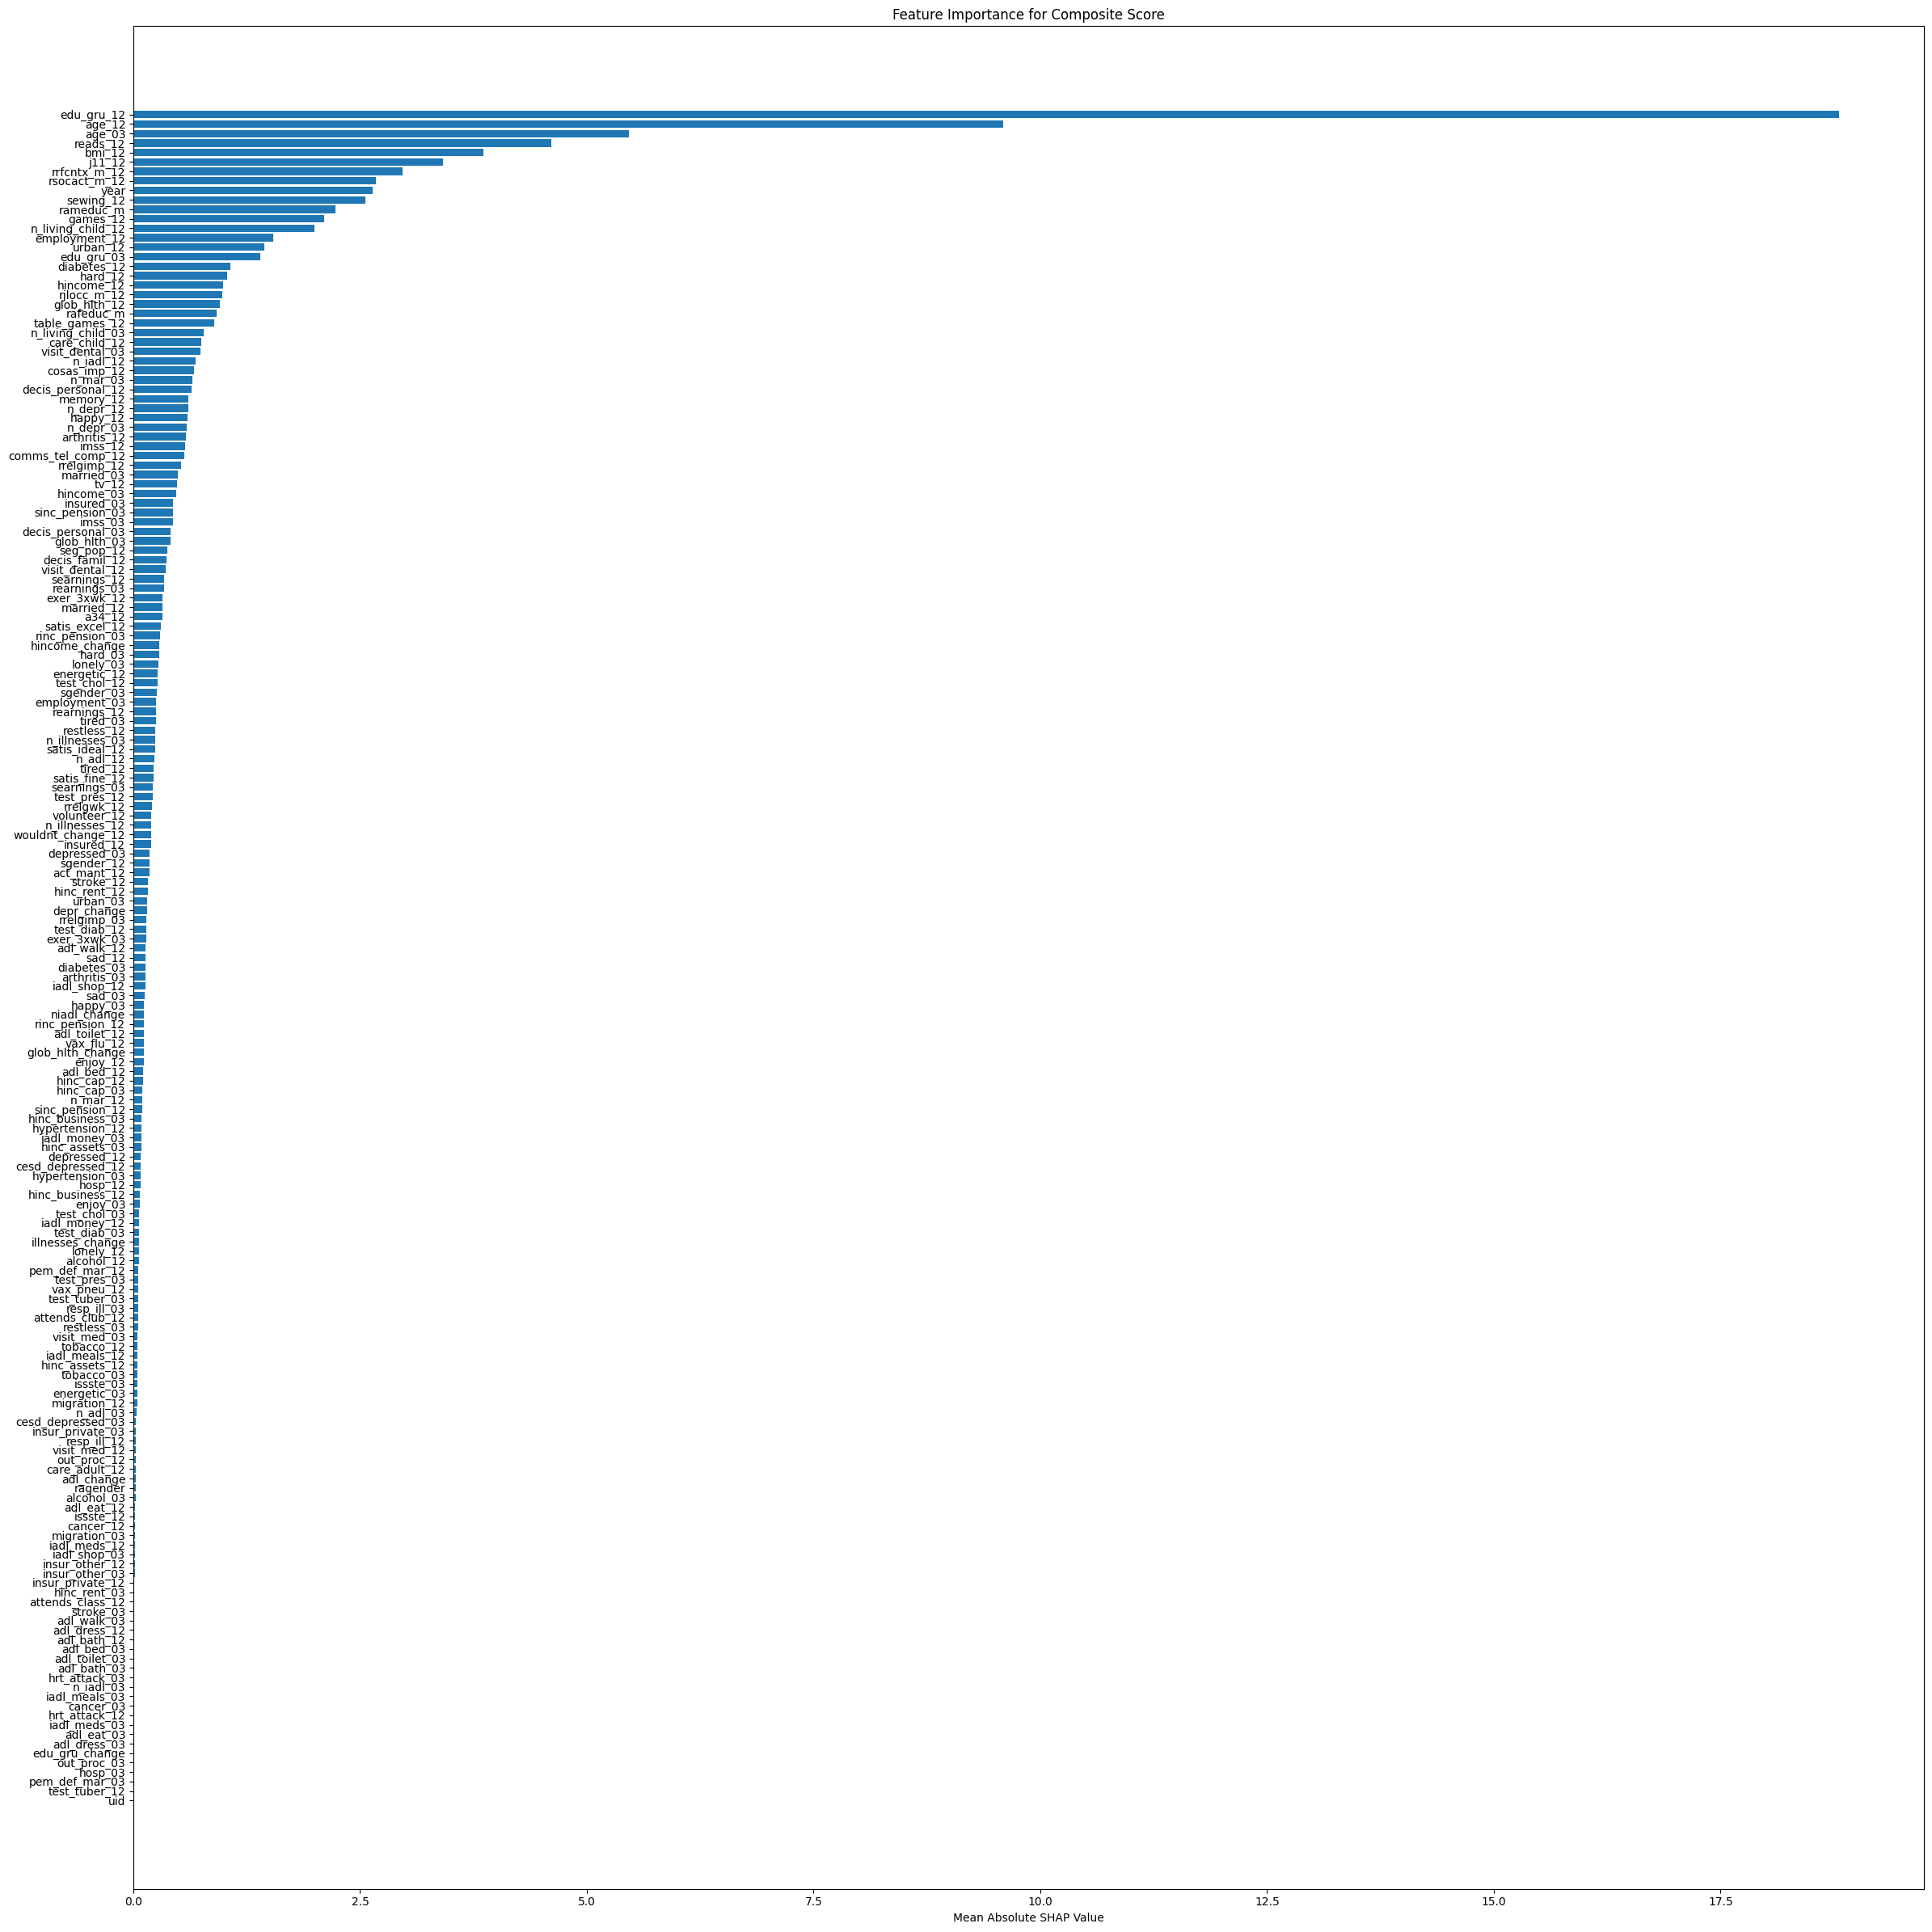

In [10]:
######################## Process Test Data ####################
data_test[features] = data_test[features].apply(pd.to_numeric, errors='coerce')
data_test[features] = data_test[features].fillna(data[features].mean())
data_test = data_test.dropna(subset=[target])

X_test = data_test[features]
y_test = data_test[target]
############################################

# # Split the data
# X_train, _, y_train, _ = train_test_split(X, y, test_size=0.001, random_state=42)


# Best parameters for CatBoost
best_params = {
    'depth': 6,
    'learning_rate': 0.025804617832891515,
    'l2_leaf_reg': 0.22567510948252656,
    'random_strength': 1.8064759944089426,
    'bagging_temperature': 0.4675254776654324,
    'iterations': 1224
}

# Initialize and train CatBoostRegressor
# categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
model2 = CatBoostRegressor(
    **best_params,
    loss_function='RMSE',
    # cat_features=categorical_features,
    verbose=100,
    early_stopping_rounds=500,
    random_state=42
)
model2.fit(X_train, y_train, eval_set=(X_test, y_test))

# Make predictions
y_pred = model2.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Plot predictions vs actual
def plot_predictions_vs_actual(y_test, y_pred):
    plt.figure(figsize=(10, 10))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Predicted vs Actual Values")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.show()

plot_predictions_vs_actual(y_test, y_pred)
# plt.savefig('/home/data3/Ali/Code/Moghis/results/predictions_vs_actual_composite_score.png', bbox_inches='tight')

explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(X_test)
feature_importance = pd.DataFrame({
    'Feature': features,
    'Mean_Absolute_SHAP': np.mean(np.abs(shap_values), axis=0)
})
feature_importance = feature_importance.sort_values(by='Mean_Absolute_SHAP', ascending=False)

feature_importance.to_csv('/home/data3/Ali/Code/Moghis/results/feature_importance_composite_score.csv', index=False)
plt.figure(figsize=(24, 24))
plt.barh(feature_importance['Feature'], feature_importance['Mean_Absolute_SHAP'])
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Feature Importance for Composite Score')
plt.tight_layout()
plt.show()
# plt.savefig('/home/data3/Ali/Code/Moghis/results/feature_importance_plot_composite_score.png', bbox_inches='tight')
plt.close()



## XGBoost ##

[0]	validation_0-rmse:75.40983
[1]	validation_0-rmse:73.94125
[2]	validation_0-rmse:72.31332
[3]	validation_0-rmse:71.40091
[4]	validation_0-rmse:69.98119
[5]	validation_0-rmse:69.10617
[6]	validation_0-rmse:67.74422
[7]	validation_0-rmse:66.43466
[8]	validation_0-rmse:65.35404
[9]	validation_0-rmse:64.25399
[10]	validation_0-rmse:63.07013
[11]	validation_0-rmse:61.99776
[12]	validation_0-rmse:61.42681
[13]	validation_0-rmse:60.31453
[14]	validation_0-rmse:59.64066
[15]	validation_0-rmse:58.75951
[16]	validation_0-rmse:57.80328
[17]	validation_0-rmse:57.42992
[18]	validation_0-rmse:56.60536
[19]	validation_0-rmse:56.04220
[20]	validation_0-rmse:55.32077
[21]	validation_0-rmse:54.68944
[22]	validation_0-rmse:54.10966
[23]	validation_0-rmse:53.47228
[24]	validation_0-rmse:52.78381
[25]	validation_0-rmse:52.58102
[26]	validation_0-rmse:51.82805
[27]	validation_0-rmse:51.25316
[28]	validation_0-rmse:50.79108
[29]	validation_0-rmse:50.18346
[30]	validation_0-rmse:49.78991
[31]	validation_0-

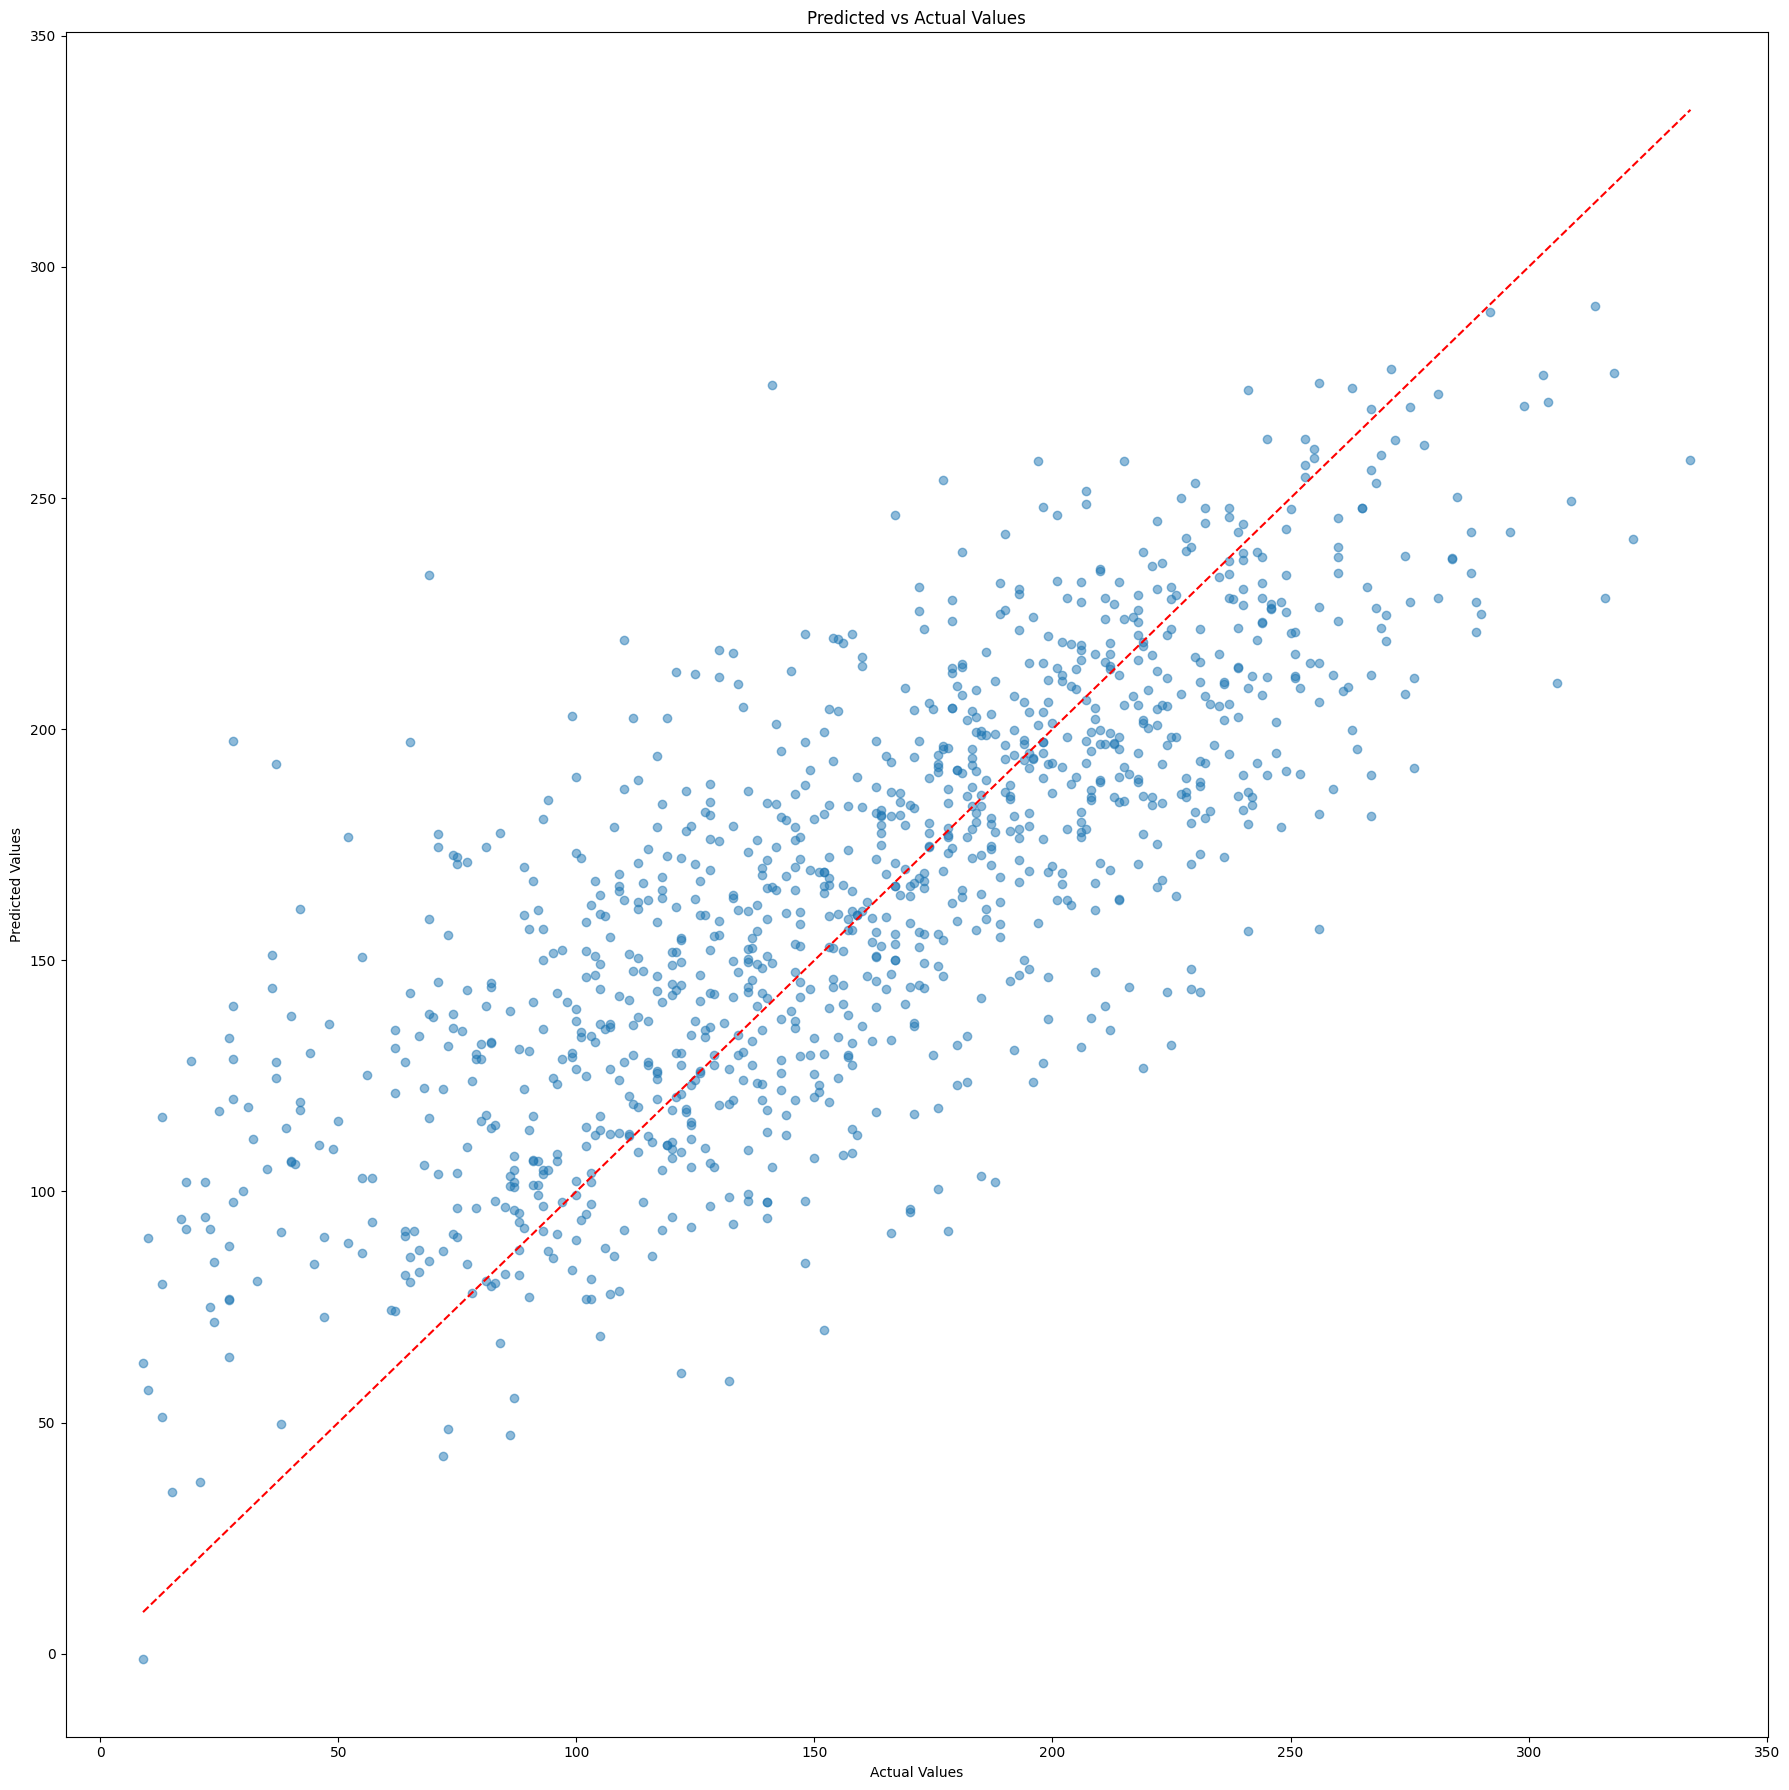

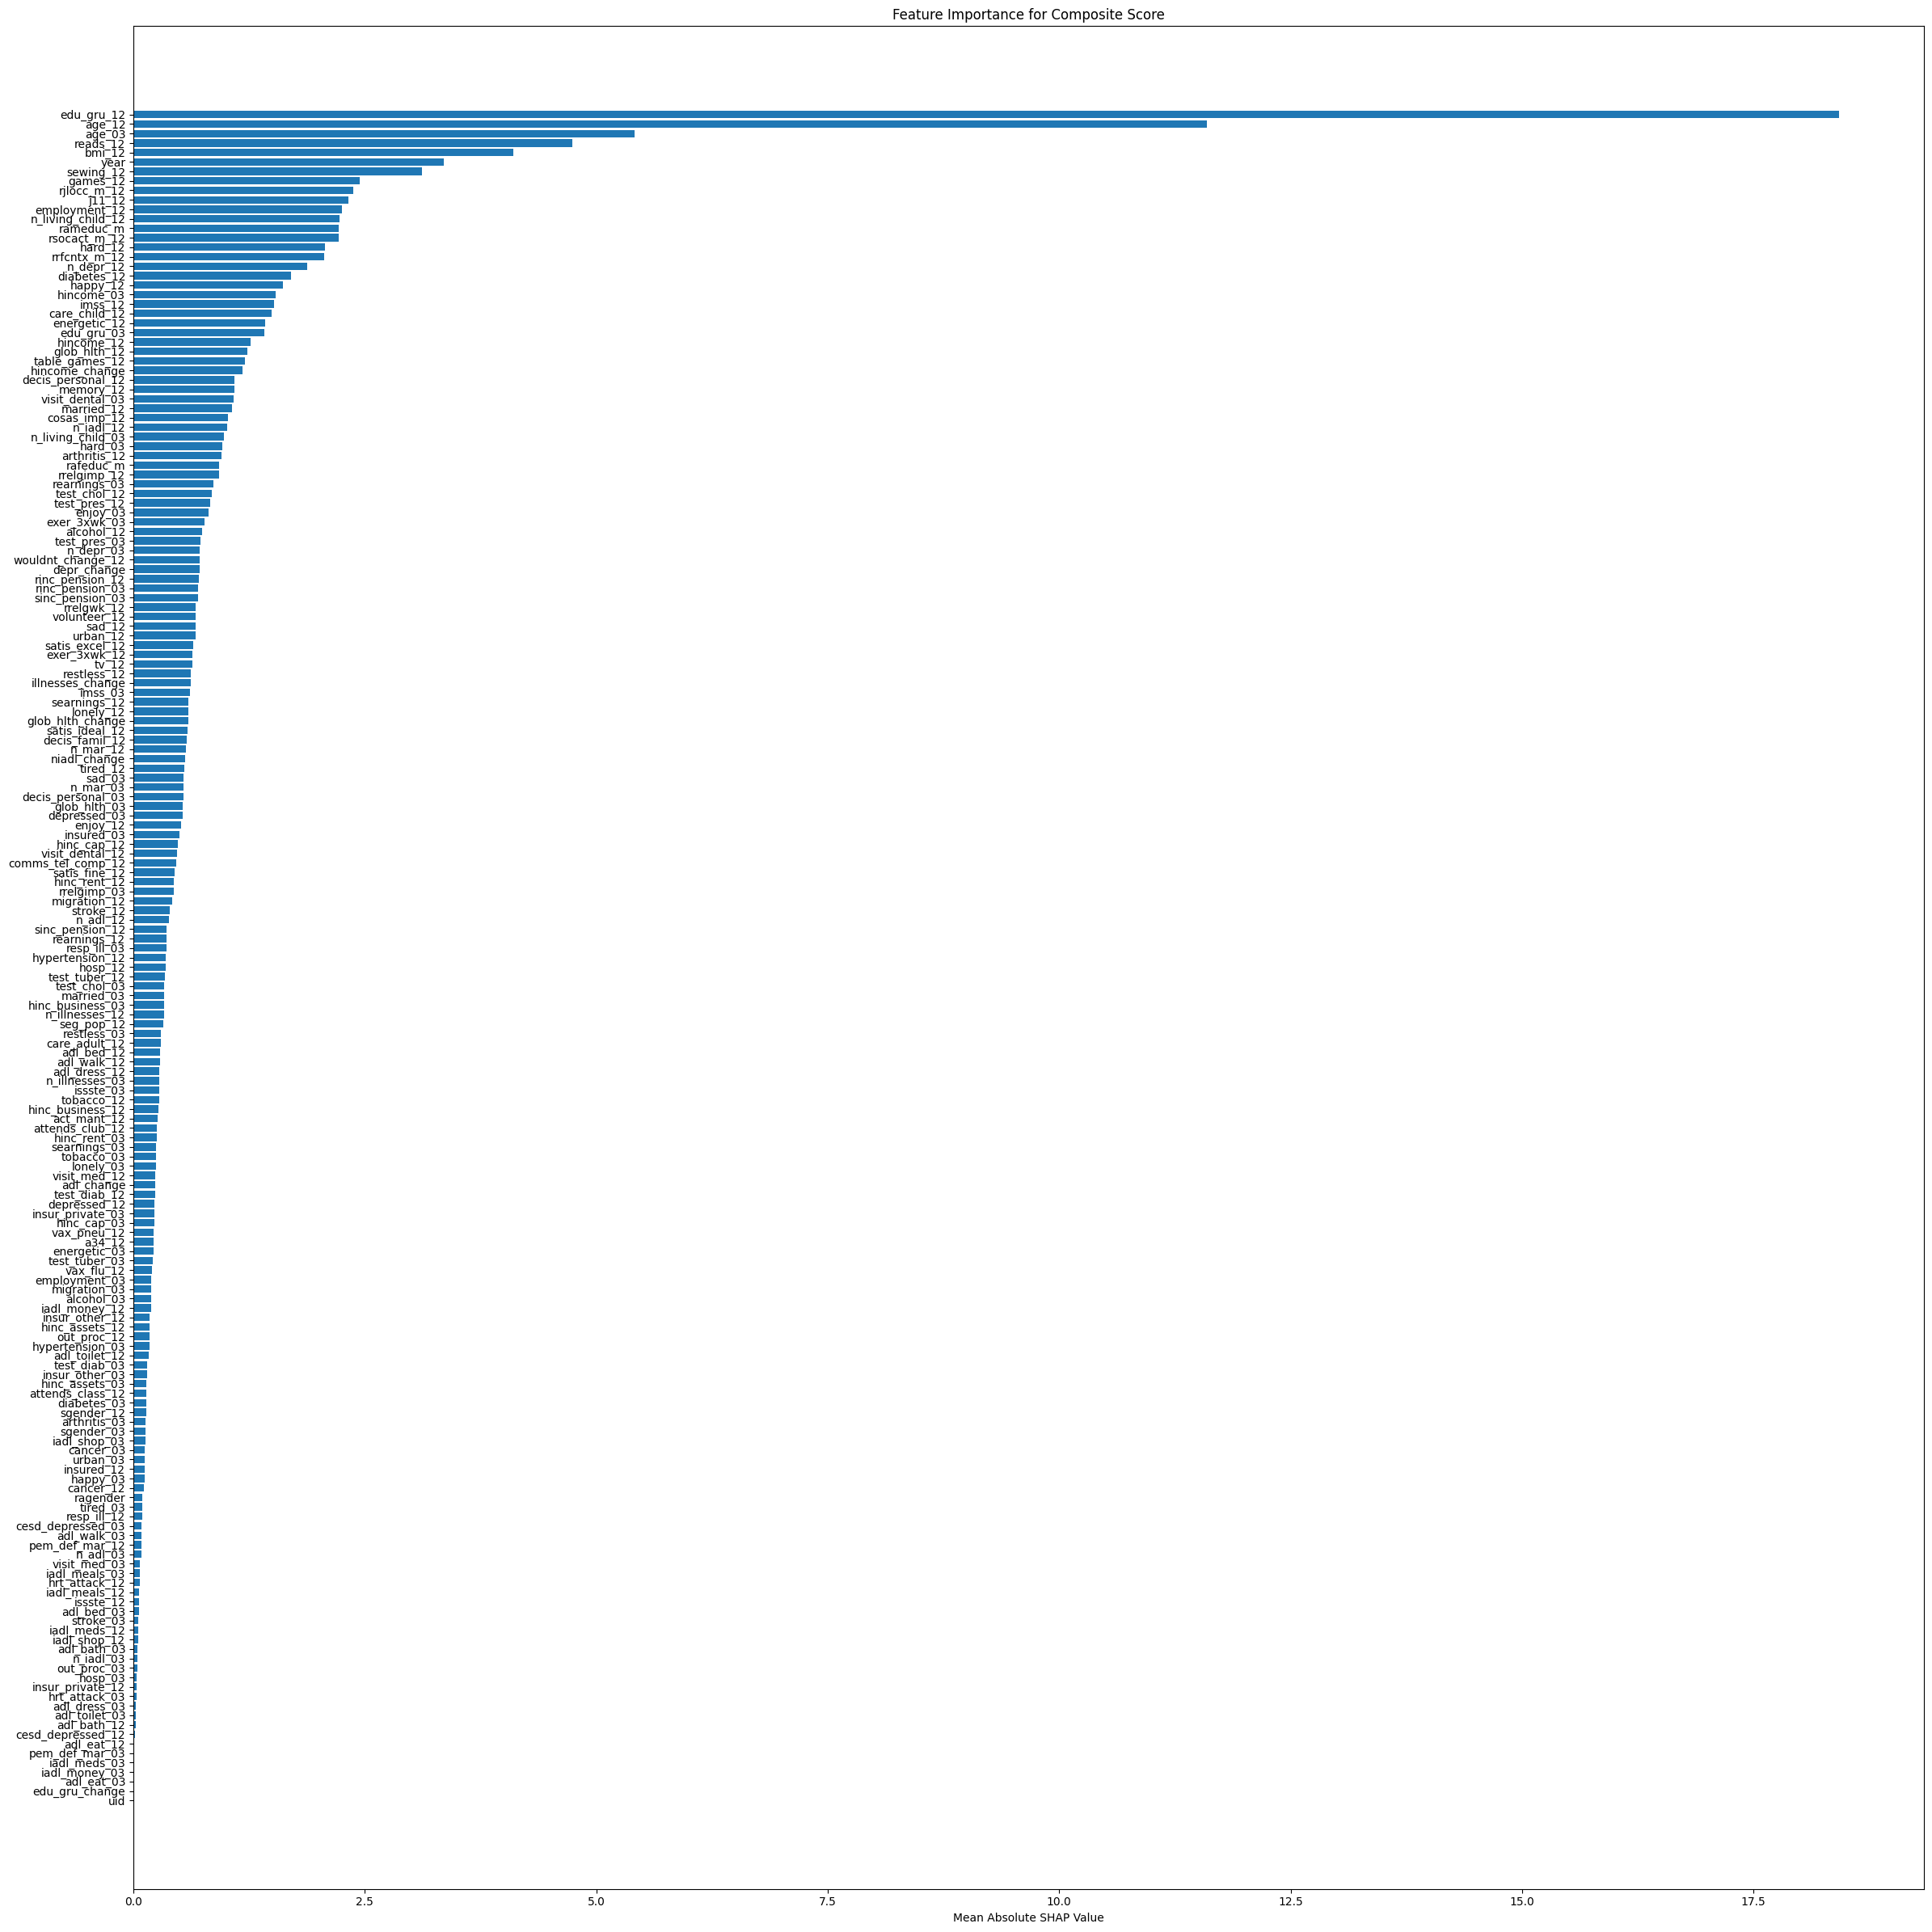

In [12]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.001, random_state=42)

# Best parameters for XGBoost
best_params = {
  'learning_rate': 0.033763045458285304,
  'max_depth': 3,
  'min_child_weight': 14,
  'subsample': 0.9500263286639197,
  'colsample_bytree': 0.7747635615654157,
  'gamma': 7.558507636378349,
  'reg_alpha': 0.4378783168336932,
  'reg_lambda': 2.8408676886824322,
  'n_estimators': 2804
  }


model2 = XGBRegressor(**best_params, random_state=42)
model2.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)

# Make predictions
y_pred = model2.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Plot predictions vs actual
def plot_predictions_vs_actual(y_test, y_pred):
    plt.figure(figsize=(18, 18))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Predicted vs Actual Values")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.tight_layout()
    plt.savefig('/home/data3/Ali/Code/Moghis/results/XGBoost/predictions_vs_actual_composite_score.png', bbox_inches='tight')
    plt.show()

plot_predictions_vs_actual(y_test, y_pred)

explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(X_test)
feature_importance = pd.DataFrame({
    'Feature': features,
    'Mean_Absolute_SHAP': np.mean(np.abs(shap_values), axis=0)
})

feature_importance = feature_importance.sort_values(by='Mean_Absolute_SHAP', ascending=False)

# feature_importance.to_csv('/home/data3/Ali/Code/Moghis/results/XGBoost/feature_importance_composite_score.csv', index=False)
plt.figure(figsize=(24, 24))
plt.barh(feature_importance['Feature'], feature_importance['Mean_Absolute_SHAP'])
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Feature Importance for Composite Score')
plt.tight_layout()
plt.show()
# plt.savefig('/home/data3/Ali/Code/Moghis/results/XGBoost/feature_importance_plot_composite_score.png', bbox_inches='tight')
plt.close()

## Random Forest ##


Mean Squared Error: 1770.9491
R^2 Score: 0.5576


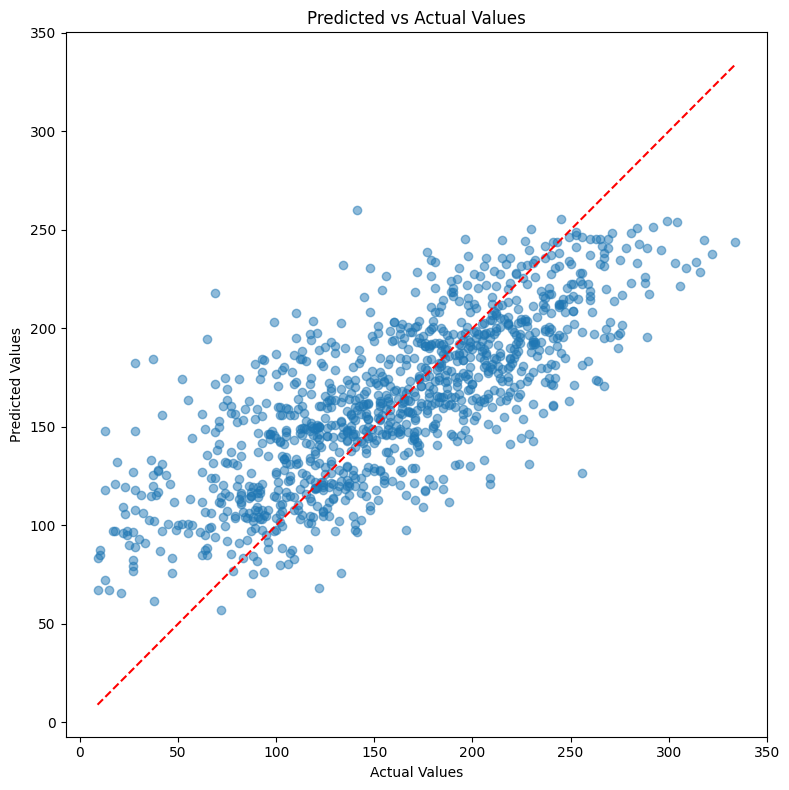

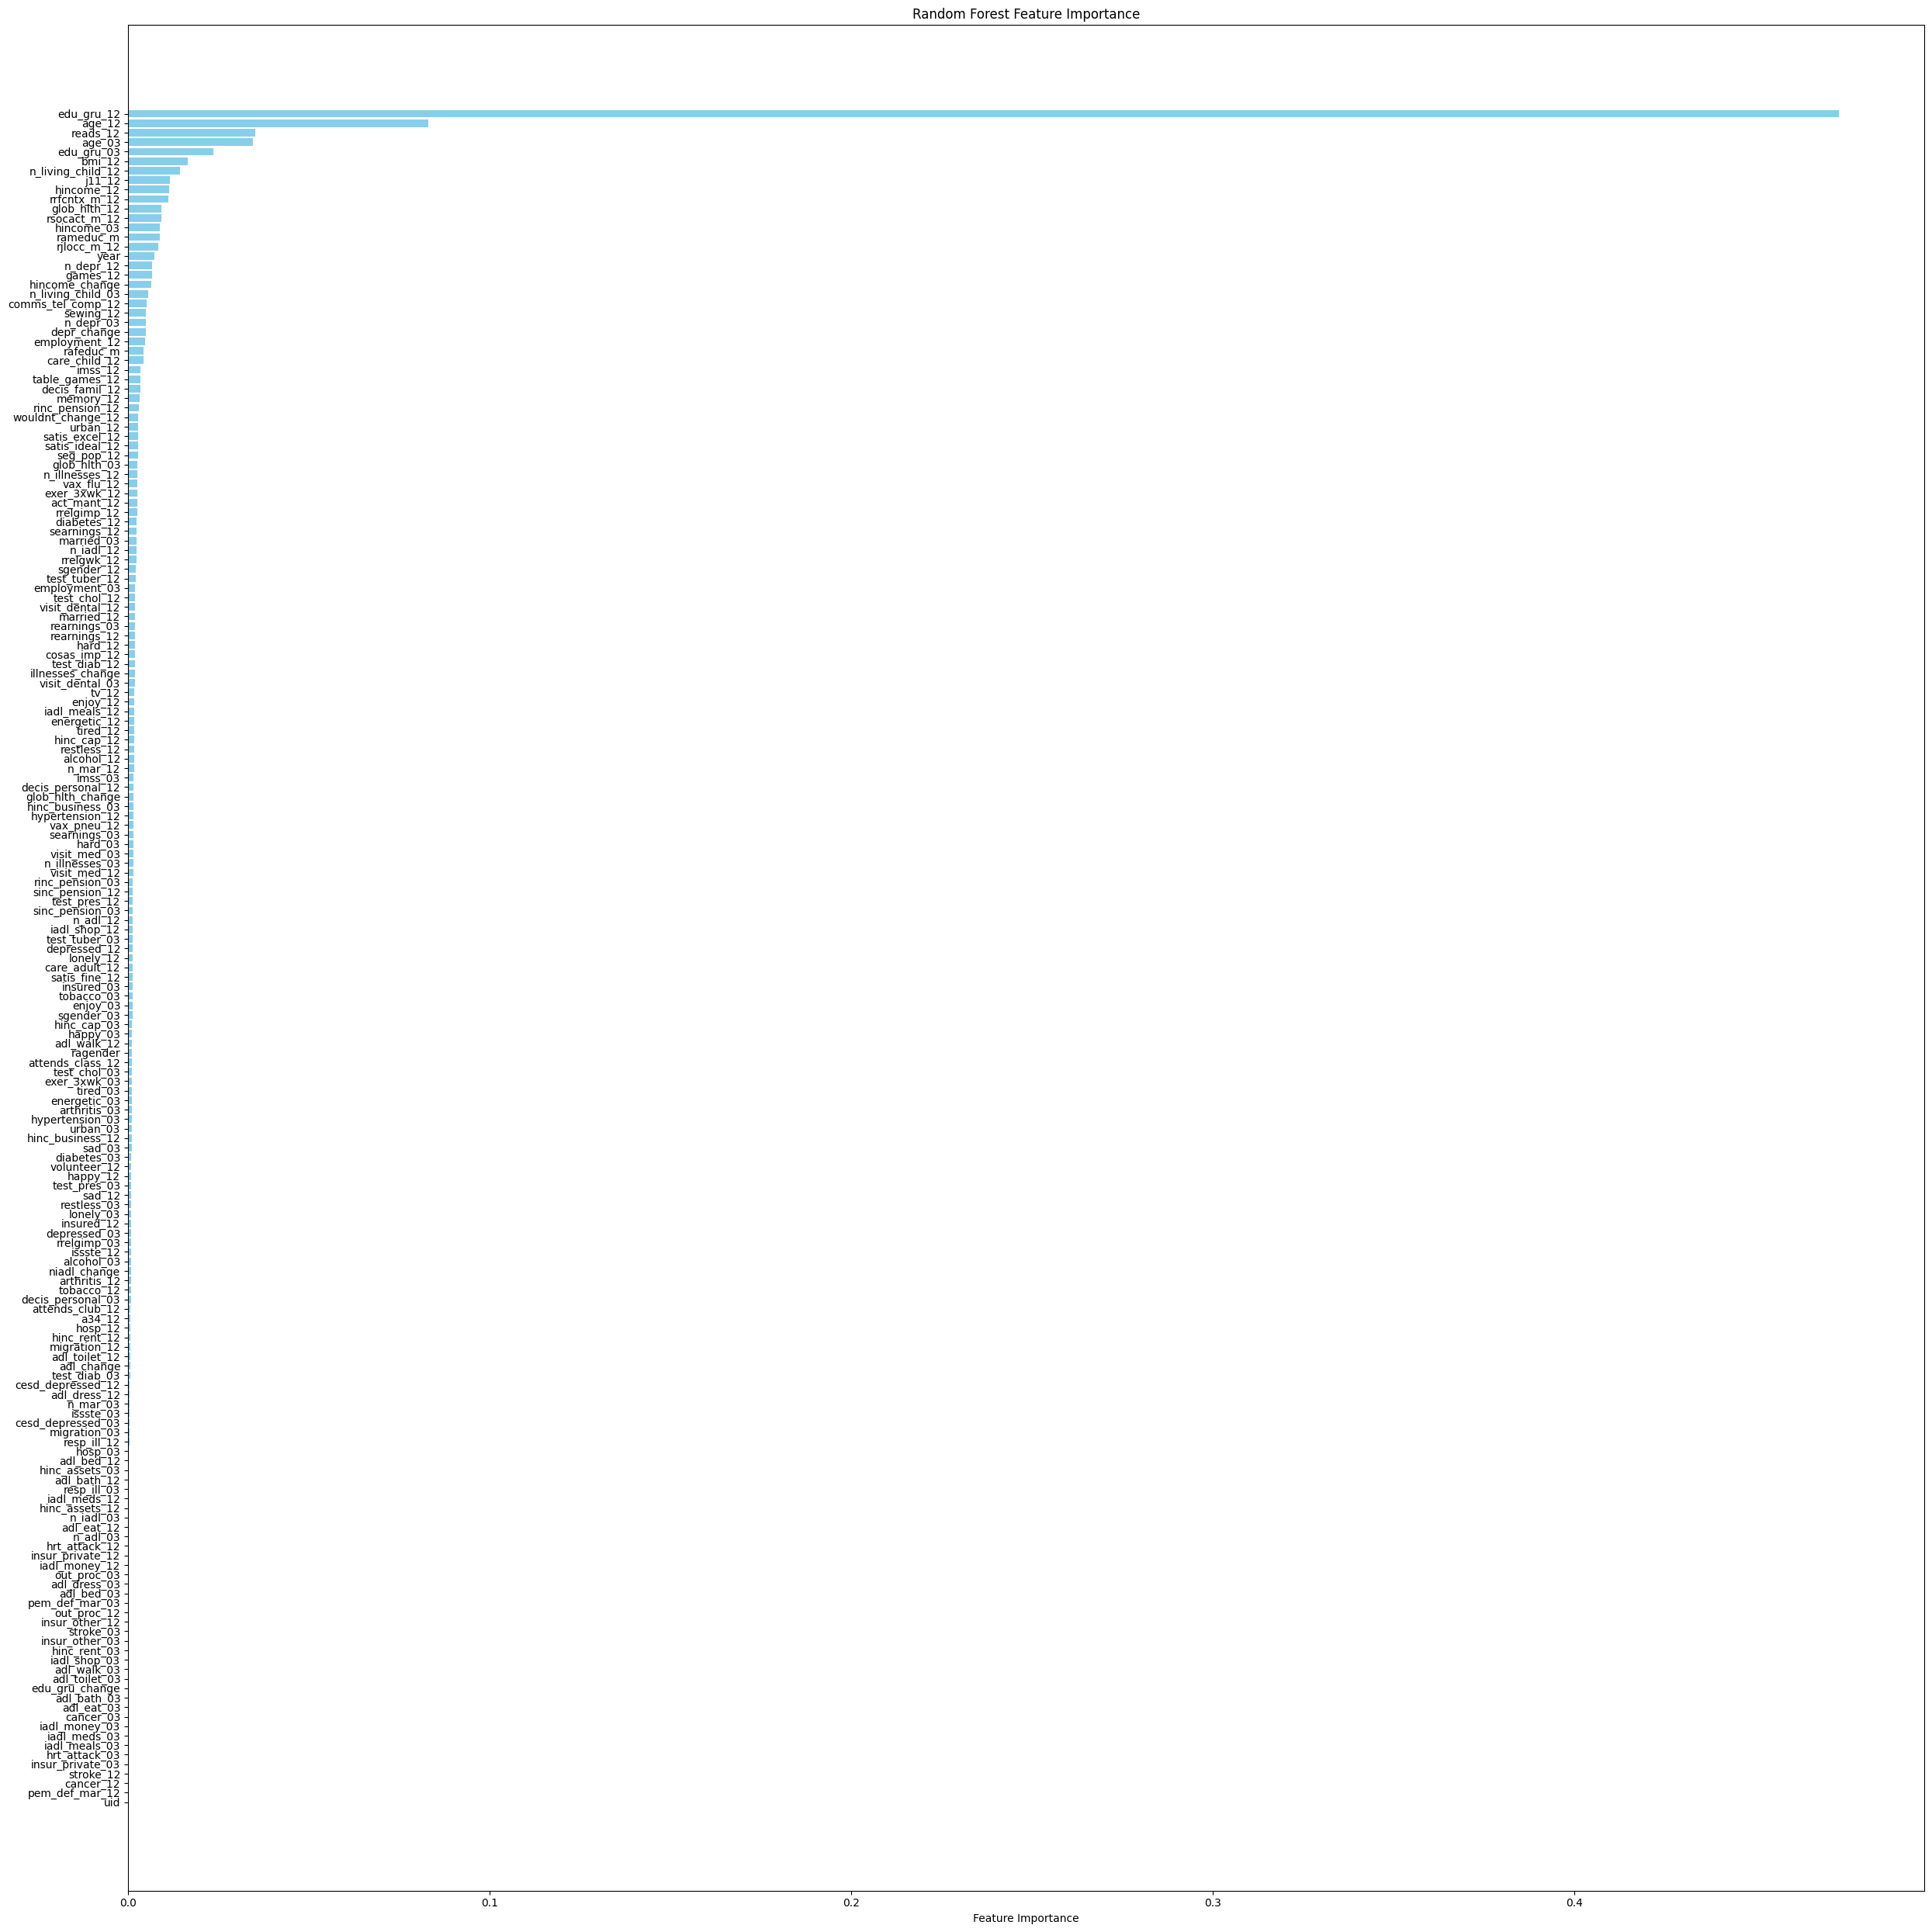

In [13]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.001, random_state=42)

# Best parameters for CatBoost
best_params = {
  'max_depth': 30,
  'min_samples_split': 22,
  'min_samples_leaf': 6,
  'max_features': 0.8191960808589205,
  'n_estimators': 97
}

model2 = RandomForestRegressor(**best_params, random_state=42)
model2.fit(X_train, y_train)

# Make predictions
y_pred = model2.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Plot predictions vs actual
def plot_predictions_vs_actual(y_test, y_pred):
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Predicted vs Actual Values")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.tight_layout()
    # plt.savefig('/home/data3/Ali/Code/Moghis/results/RandomForest/predictions_vs_actual_composite_score.png', bbox_inches='tight')
    plt.show()

plot_predictions_vs_actual(y_test, y_pred)

# Extract feature importances
rf_feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model2.feature_importances_
})

# Sort by importance
rf_feature_importance = rf_feature_importance.sort_values(by='Importance', ascending=False)

# Save to CSV
rf_feature_importance.to_csv('/home/data3/Ali/Code/Moghis/results/RandomForest/feature_importance_rf.csv', index=False)

# Plot feature importance
plt.figure(figsize=(25, 25))
plt.barh(rf_feature_importance['Feature'], rf_feature_importance['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()
# plt.savefig('/home/data3/Ali/Code/Moghis/results/RandomForest/feature_importance_plot_rf.png', bbox_inches='tight')
plt.close()

